# Исследование данных по компьютерным играм

# Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».


**Цель:**

* В этом проекте мы будем выявлять критерии и закономерности успешности игр. 

**Шаг 1. Откройте файл с данными и изучите общую информацию**
Путь к файлу: /datasets/games.csv. 


**Шаг 2. Подготовьте данные**
* Замените названия столбцов (приведите к нижнему регистру);
* Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
* Обработайте пропуски при необходимости:
* Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
* Опишите причины, которые могли привести к пропускам;
* Обратите внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно разберите это значение и опишите, как его обработать;
* Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.


**Шаг 3. Проведите исследовательский анализ данных**
* Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
* Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
* Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
* Не учитывайте в работе данные за предыдущие годы.
* Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
* Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.
* Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
* Соотнесите выводы с продажами игр на других платформах.
* Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?


**Шаг 4. Составьте портрет пользователя каждого региона**
* Определите для пользователя каждого региона (NA, EU, JP):
* Самые популярные платформы (топ-5). Опишите различия в долях продаж.
* Самые популярные жанры (топ-5). Поясните разницу.
* Влияет ли рейтинг ESRB на продажи в отдельном регионе?


**Шаг 5. Проверьте гипотезы**
* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
* Задайте самостоятельно пороговое значение alpha.


**Поясните:**
* Как вы сформулировали нулевую и альтернативную гипотезы;
* Какой критерий применили для проверки гипотез и почему.


**Шаг 6. Напишите общий вывод**



## Шаг 1. Откройте файл с данными и изучите общую информацию

Импортируем необходимые библиотеки 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy import stats as st

Открываем файл и сохраняем его в переменную data

In [2]:
data = pd.read_csv('/datasets/games.csv',sep=',', decimal = '.')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


**Посмотрю лбщую информацию о данных, наличие дубликатов, пропусков**

In [3]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [4]:
data.duplicated().sum()

0

In [5]:
data.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [6]:
print('Пропуски в Name',(2/16715)*100)
print('Пропуски в Year_of_Release', (269/16715)*100)
print('Пропуски в Critic_Score', (8578/16715)*100)
print('Пропуски в User_Score', (6701/16715)*100)
print('Пропуски в Rating', (6766/16715)*100)     


Пропуски в Name 0.011965300628178284
Пропуски в Year_of_Release 1.609332934489979
Пропуски в Critic_Score 51.31917439425665
Пропуски в User_Score 40.08973975471134
Пропуски в Rating 40.478612025127134


**Вывод:**

**Типы данных**
* Name, Platform, Genre, User_Score, Rating - текстовое или смешанное не числовое значение
* Year_of_Release, NA_sales, EU_sales, JP_sales, Other_sales, Critic_Score - числа с плавающей точкой


**Дубликаты**

Полных дубликатов в таблице нет

**Пропуски**

* в столбце Name менее 1% пропусков;
* в столбце Year_of_Release 1,6% пропусков;
* в столбце Critic_Score 51,3% пропусков;
* в столбце User_Score 40 % пропусков;
* в столбце Rating 40,5% пропусков.

## Шаг 2. Подготовьте данные

**Заменим названия столбцов (приведем к нижнему регистру)**

In [7]:
data.columns = data.columns.str.lower()
data.tail()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


**Преобразую данные в нужные типы. Обработаю пропуски при необходимости:**

Столбец 'year_of_release'

In [8]:
data['year_of_release'] = data['year_of_release'].fillna(9999)
data['year_of_release'] = data['year_of_release'].astype('int')


Пропусков в столбце year_of_release 1,6% заменю их на 9999, так как адекватно заменить их не получится. 
Полагаю, что эти пропуски могли возникнуть из-за разных дат релизов игр на разных платформах. 

Столбец 'Critic_Score'

In [9]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

In [10]:
data['critic_score'] = data['critic_score'].fillna(-1)


Заполнение столбца средним исказит результаты, так как пропусков 51%. Заполню пропуски "-1"

Столбец 'User_Score'

In [11]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [12]:
data[data['user_score'] == 'tbd']['user_score'].count()


2424

In [13]:
data.loc[data['user_score'] == 'tbd','user_score'] = np.nan


In [14]:
data['user_score'] = data['user_score'].astype('float')

In [15]:
data['user_score'] = data['user_score'].fillna(-1)

В стобце user_score есть tbd. Заменю их на nan, все остальные пропуски на -1
Изменю тип данных

Столбец 'Rating'

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
data['rating'] = data['rating'].fillna('no_rating')


In [18]:
data['rating']

0                E
1        no_rating
2                E
3                E
4        no_rating
           ...    
16710    no_rating
16711    no_rating
16712    no_rating
16713    no_rating
16714    no_rating
Name: rating, Length: 16715, dtype: object

В столбце raiting заполнить пропуски можно было бы соотнеся с названием игр, но, возможно, на разных платформах, в разных странах возврастной рейтинг может отличаться. Поэтому заполню эти пропуски заглушкой 'no_rating'

**Столбец name**

In [19]:
data.query('name.isnull()')


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,-1.0,-1.0,no_rating
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,-1.0,-1.0,no_rating


2 пропуска в name и genre оказались в одном месте. Думаю, что их возникновение взаимосвязано  (без названия невозможно определить жанр). Удалю их.

In [20]:
data = data.dropna(subset=['name'])


In [21]:
data.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

**Считаю суммарные продажи во всех регионах.**

In [22]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,no_rating,31.38


## Шаг 3. Проведите исследовательский анализ данных




Соотнесите выводы с продажами игр на других платформах.



**Посмотрю сколько игр выпускалось в разные годы.**

Text(0, 0.5, 'Количество игр')

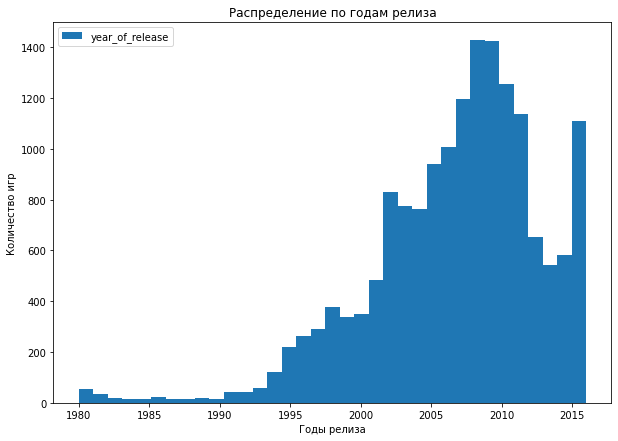

In [23]:
data[data['year_of_release'] != 9999]['year_of_release'].plot(kind='hist', bins=35, figsize=(10,7)).legend()
plt.title('Распределение по годам релиза')
plt.xlabel('Годы релиза')
plt.ylabel('Количество игр')

С 1995 года виден рост количества релизов игр.  Больше всего игр вышло в период с примерно 2007 по 2011, далее идет спад до 2015 года. Возможно это связано с тем, что с 2010 года популярность набирают телефоны и игры на них, данных по которым у нас нет.

**Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?**

In [24]:
platforms = (data.groupby(['platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('total_sales',ascending = False)
                           )

platforms.head(5)


,platform,total_sales
16,PS2,1255.77
28,X360,971.42
17,PS3,939.65
26,Wii,907.51
4,DS,806.12


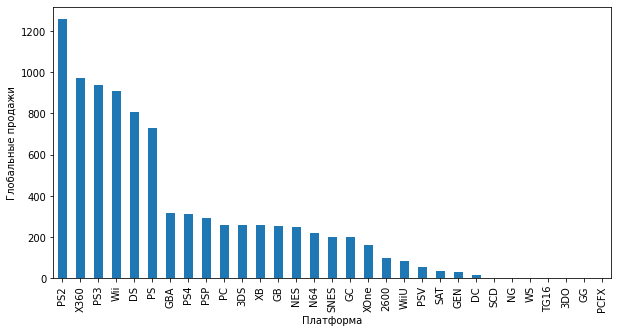

In [25]:
(platforms.plot(kind='bar',x='platform', y='total_sales',figsize=(10, 5),legend=False)
                         .set(xlabel='Платформа', ylabel='Глобальные продажи')
)
plt.show()

In [26]:
top_platforms = platforms.head(5)['platform'].tolist()
top_platforms

['PS2', 'X360', 'PS3', 'Wii', 'DS']

Лидирует 6 платформ PS2, X360, PS3, Wii, DS, PS. Построю график по лидерам и посмотрю сроки их "жизни".

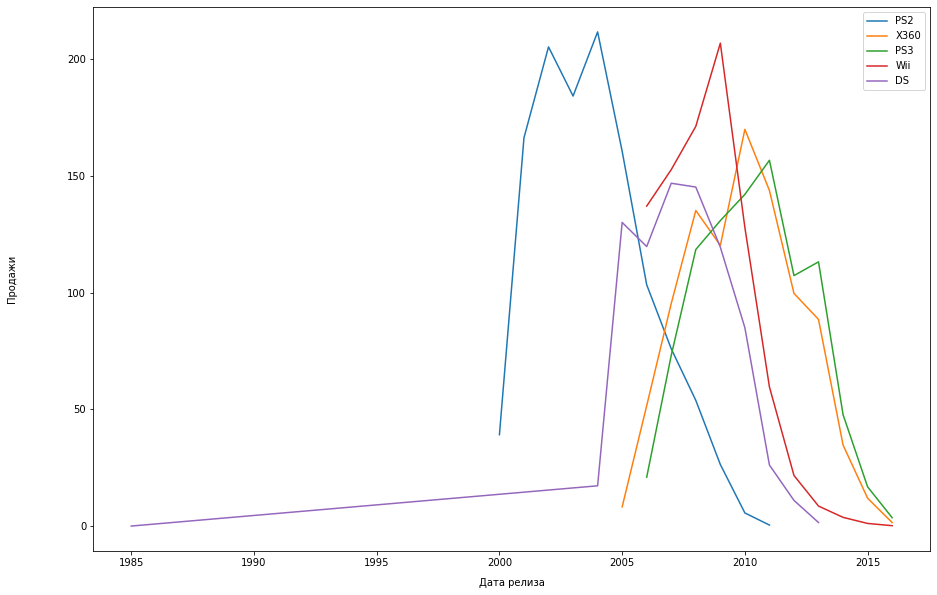

In [27]:
for c in top_platforms:
    data.query('platform == @c and year_of_release != 9999').pivot_table(index = 'year_of_release',
                        values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',
                                                    ascending = False)['total_sales'].plot(figsize = (15, 10), label=c)
   
    plt.xlabel('Дата релиза', labelpad = 10)
    plt.ylabel('Продажи', labelpad = 50)
    plt.legend()

По графику видно, что характерный срок "жизни" платформ около 10 лет. Платформа DS просуществовала с 1985 почти по 2015 год.

В большей части бизнесов стратегическое планирование происходит на срок 3-5 лет, В дальнейшем анализе буду использовтаь актуальный период 3 года. В разработке и выпуске игр нужно быть гибким иследовать трендам. Поэтому выберу такой период.

**Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.**

In [28]:
profited_platforms = data.query('year_of_release>=2013 and year_of_release !=9999')
top_profited_platforms = (profited_platforms.groupby(['platform'], as_index=False)['total_sales'].sum().sort_values('total_sales', ascending=False))

top_profited_platforms


,platform,total_sales
4,PS4,314.14
3,PS3,181.43
10,XOne,159.32
0,3DS,143.25
9,X360,136.80
8,WiiU,64.63
2,PC,39.43
6,PSV,32.99
7,Wii,13.66
5,PSP,3.50


По суммам продаж с 2013 лидируют PS4, PS3, XOne, 3DS, X360

In [29]:
top_profited_platforms['platform'].unique()

array(['PS4', 'PS3', 'XOne', '3DS', 'X360', 'WiiU', 'PC', 'PSV', 'Wii',
       'PSP', 'DS'], dtype=object)

In [30]:
actual_profited_platforms = ['PS4', 'PS3', 'X360', '3DS', 'XOne', 'WiiU', 'PC', 'PSV', 'Wii',
       'DS', 'PSP']

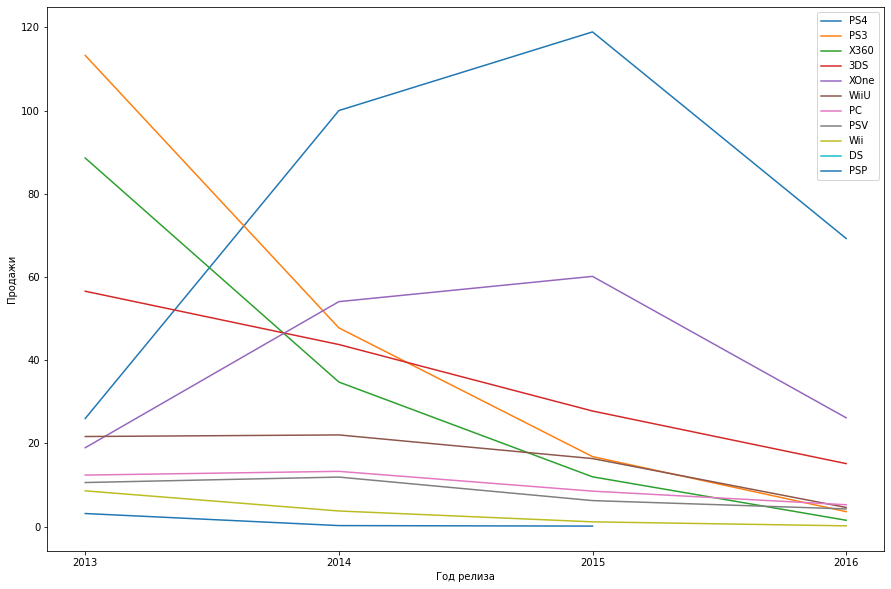

In [31]:
for a in actual_profited_platforms:
    profited_platforms.query('platform == @a').pivot_table(index = 'year_of_release',values = 'total_sales', aggfunc = 'sum').sort_values('year_of_release',ascending = False)['total_sales'].plot(figsize=(15, 10), label = a)
    
    plt.xticks(np.arange(2013, 2017, step=1))
    plt.xlabel('Год релиза')
    plt.ylabel('Продажи')
    plt.legend()


На платформах PS4, XOne продажи сначала растут, далее падают.
 
Самые высокие результаты показывает PS4. PS3 и XOne почти в 2 раза меньше. Выберу платформы PS4, PS3 и XOne как потенциально прибыльные.

In [32]:
more_profited_platforms = profited_platforms.query('platform == "PS3" or platform == "PS4" or platform =="XOne"')
more_profited_platforms_for_analysis = (more_profited_platforms.groupby(['year_of_release','platform'],as_index = False)['total_sales'].sum()
                                 .sort_values('platform',ascending = False)
                           )
more_profited_platforms_for_analysis



,year_of_release,platform,total_sales
2,2013,XOne,18.96
5,2014,XOne,54.07
8,2015,XOne,60.14
11,2016,XOne,26.15
1,2013,PS4,25.99
4,2014,PS4,100.00
7,2015,PS4,118.90
10,2016,PS4,69.25
0,2013,PS3,113.25
3,2014,PS3,47.76


**Постройте график «ящик с усами» по глобальным продажам игр в разбивке по платформам. Опишите результат.**


In [33]:
more_profited_platforms_for_analysis['total_sales'].describe()

count     12.000000
mean      54.574167
std       39.143463
min        3.600000
25%       24.232500
50%       50.915000
75%       76.937500
max      118.900000
Name: total_sales, dtype: float64

In [34]:
#plt.figure(figsize=(15,15))
#sns.boxplot(data=profited_platforms, x='platform', y='total_sales').set(title='Продажи с 2013-2016', #xlabel='Платформы' , ylabel='Продажи')
#plt.show()



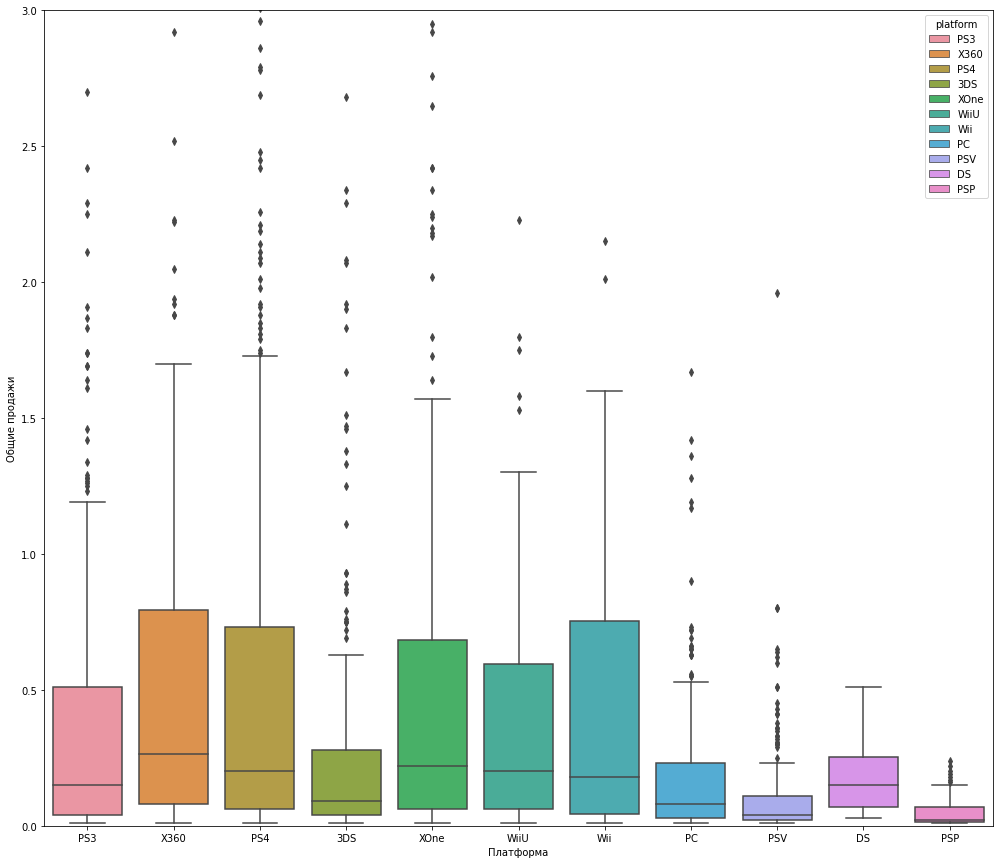

In [35]:
plt.figure(figsize=(17,15))
sns.boxplot(x='platform', y='total_sales', data=profited_platforms , hue='platform', dodge=False)
plt.xlabel('Платформа')
plt.ylabel('Общие продажи')
plt.ylim(0,3)
plt.show()

PS4 самый большой объем продаж.

Платформы PS3, X360, PS4, 3DS, XOne выпустили какие-то хайповые и очень популярные игры, судя по выбросам.

Медиана общих продаж близка на платформах XOne WiiU Wii PS4 X360

PSP самый маленький объем продаж

 XOne минимальное значение около 20, медиана 40. Максимальное значение 60.
 PS4 минимальное значение около 30, медиана около 90, максимальное значение около 120.
 PS3 минимальное значение около 10, медиана около 30, максимальное значение около 120.
 Максимум PS4 и PS3 примерно на одном уровне.
 
 В среднем PS4 продается большее количество раз. PS3 меньшее.


**Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.**

In [36]:
profited_platforms_no_score = profited_platforms[profited_platforms['user_score'] != -1]

Коэф.корреляции -0.031957110204556376


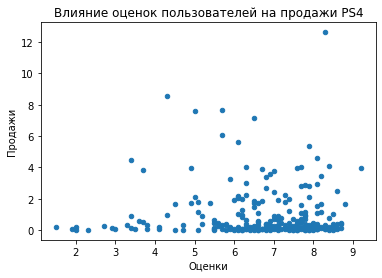

In [37]:
print('Коэф.корреляции',profited_platforms_no_score[profited_platforms_no_score['platform'] == 'PS4']['user_score'].corr(profited_platforms_no_score['total_sales']) )
profited_platforms_no_score[profited_platforms_no_score['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter')

plt.title('Влияние оценок пользователей на продажи PS4')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

Корреляция между оценками пользователей и продажами PS4 очень слабая отрцательная.

Коэф.корреляции 0.0023944027357566925


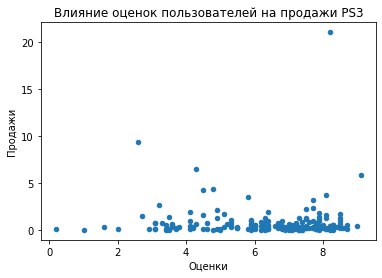

In [38]:
print('Коэф.корреляции',profited_platforms_no_score[profited_platforms_no_score['platform'] == 'PS3']['user_score'].corr(profited_platforms_no_score['total_sales']) )
profited_platforms_no_score[profited_platforms_no_score['platform'] == 'PS3'].plot(x='user_score', y='total_sales', kind='scatter')

plt.title('Влияние оценок пользователей на продажи PS3')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

Корреляция между оценками пользователей и продажами PS3 очень слабая

Коэф.корреляции -0.06892505328279414


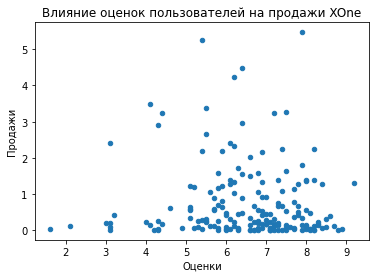

In [39]:
print('Коэф.корреляции',profited_platforms_no_score[profited_platforms_no_score['platform'] == 'XOne']['user_score'].corr(profited_platforms_no_score['total_sales']) )
profited_platforms_no_score[profited_platforms_no_score['platform'] == 'XOne'].plot(x='user_score', y='total_sales', kind='scatter')

plt.title('Влияние оценок пользователей на продажи XOne')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

Корреляция между оценками пользователей и продажами XOne очень слабая отрицательная

In [40]:
profited_platforms_no_score1 = profited_platforms[profited_platforms['critic_score'] != -1]

Коэф.корреляции 0.3342853393371919


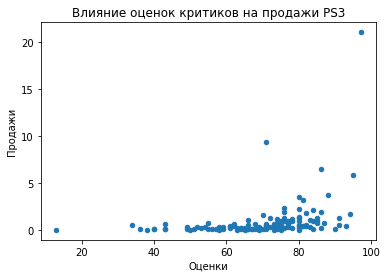

In [41]:
print('Коэф.корреляции',profited_platforms_no_score1[profited_platforms_no_score1['platform'] == 'PS3']['critic_score'].corr(profited_platforms_no_score1['total_sales']) )
profited_platforms_no_score1[profited_platforms_no_score1['platform'] == 'PS3'].plot(x='critic_score', y='total_sales', kind='scatter')

plt.title('Влияние оценок критиков на продажи PS3')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

Корреляция между оценками пользователей и продажами PS3 слабая

Коэф.корреляции 0.40656790206178095


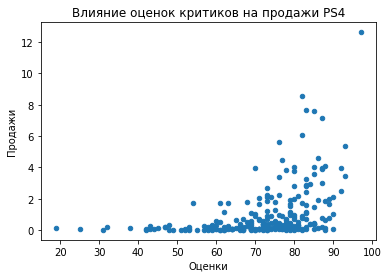

In [42]:
print('Коэф.корреляции',profited_platforms_no_score1[profited_platforms_no_score1['platform'] == 'PS4']['critic_score'].corr(profited_platforms_no_score1['total_sales']) )
profited_platforms_no_score1[profited_platforms_no_score1['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter')

plt.title('Влияние оценок критиков на продажи PS4')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

Корреляция между оценками пользователей и продажами PS4 слабая

Коэф.корреляции 0.4169983280084017


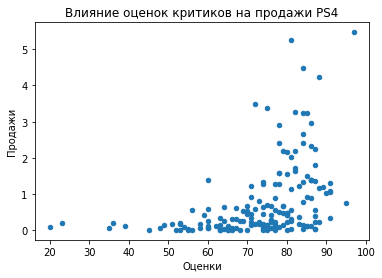

In [43]:
print('Коэф.корреляции',profited_platforms_no_score1[profited_platforms_no_score1['platform'] == 'XOne']['critic_score'].corr(profited_platforms_no_score1['total_sales']) )
profited_platforms_no_score1[profited_platforms_no_score1['platform'] == 'XOne'].plot(x='critic_score', y='total_sales', kind='scatter')

plt.title('Влияние оценок критиков на продажи PS4')
plt.xlabel('Оценки')
plt.ylabel('Продажи')
plt.show()

Корреляция между оценками пользователей и продажами XOne слабая

**Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?**

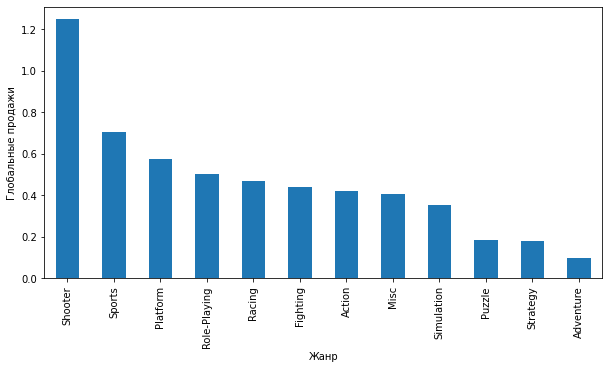

In [44]:
(profited_platforms.pivot_table(index='genre', values='total_sales').sort_values('total_sales', ascending=False).plot(kind='bar', y='total_sales', figsize=(10, 5), legend=False).set(xlabel='Жанр', ylabel='Глобальные продажи'))

plt.show()

Самые прибыльные жанры - Shooter, Sports, Platform.
Продажи Shooter почти в 6 раз выше, чем Adventure и почти в 2 раза больше Sports.

## Шаг 4. Составьте портрет пользователя каждого региона

**Определите для пользователя каждого региона (NA, EU, JP):**

* Самые популярные платформы (топ-5). Опишите различия в долях продаж.

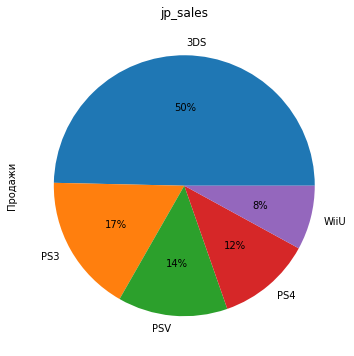

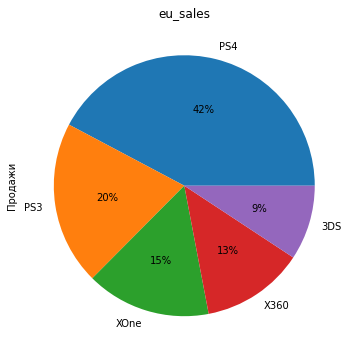

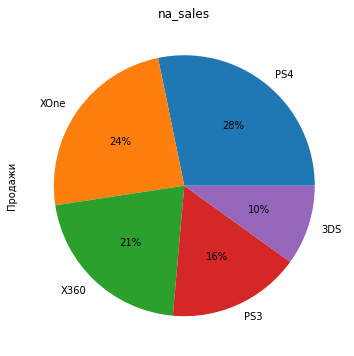

In [45]:
data_region = ['jp_sales', 'eu_sales', 'na_sales']

for r in data_region:
    (profited_platforms.pivot_table(index='platform', values=r, aggfunc='sum').sort_values(r, ascending=False).head(5).plot(kind='pie', y=r, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = r).set(ylabel='Продажи'))
    plt.show()

В Японии лидирует платформа 3DS с долей 50%. 
В Европе платформа PS4.
В Северной Америке PS4 и XOne. Европу с Северной Америкой объединяет частое более использование PS4 и XOne.

В Японии 3DS пользуется популярностью в 5 раз больше, чем в Сев Америке и в 6,25 раз больше, чем в Европе. 

* Самые популярные жанры (топ-5). Поясните разницу.

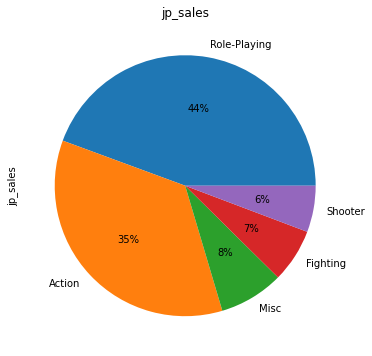

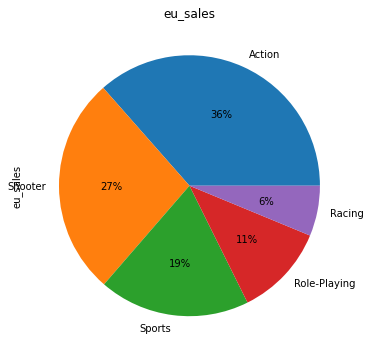

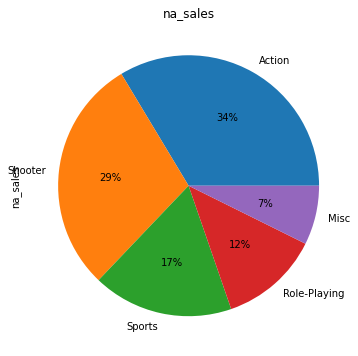

In [46]:

for r in data_region:
    (profited_platforms.pivot_table(index='genre', values=r, aggfunc='sum').sort_values(r, ascending=False).head(5).plot(kind='pie', y=r, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = r))
    

В Японии популярностью пользуются Role-Playing в 4 раза чаще, чем в Европе и Сев Америке.

Shooter в Сев Америке и Европе пользуются популярностью примерно одинаково (29 и 27%) и в 4,5 раза чаще, чем в Японии.

Action в Европе и Америке также примерно на одном уровне 34 и 36 % также как и в Японии.

**Влияет ли рейтинг ESRB на продажи в отдельном регионе?**

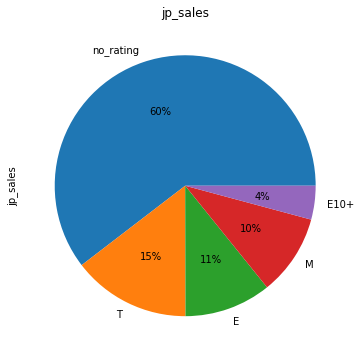

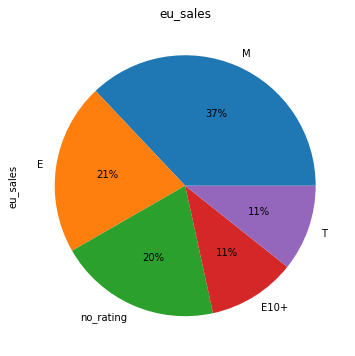

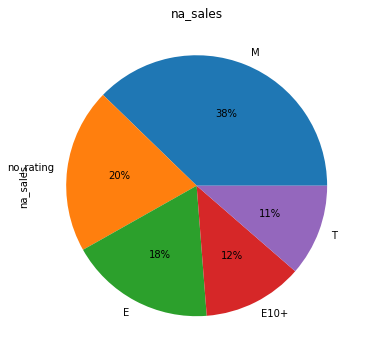

In [47]:
for r in data_region:
    (profited_platforms.pivot_table(index='rating', values=r, aggfunc='sum').sort_values(r, ascending=False).head(5).plot(kind='pie', y=r, autopct='%1.0f%%', figsize=(6, 6), legend=False, title = r))
    

В Америке и Европе примерно на одном уровне игры с рейтингом М, игры вне рейтинга и игры с рейтингом Е.

В Японии 60% игр вне рейтинга

ESRB организация, которая принимает и определяет рейтинги в США и Канаде. В Японии рейтингами занимается CERO. Предположу, что игры вне рейтинга выпущены в Японии и не оценивались ESRB.

**Портреты пользователей**

Пользователи в Японии чаще всего используют платформу 3DS, предпочитают игры в жанре Role-Playing выбирают игры вне рейтинга.

Пользователи в Европе предпочитают PS4, играют в игры Action и выбирают рейтинг М.

Пользователи в Сев Америке чаще всего выбирают PS4 и XOne. Выбирают игры в жанре Shooter и Action с рейтингом М

## Шаг 5. Проверьте гипотезы

**Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;**

H0: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

H1: Средние пользовательские рейтинги платформ Xbox One и PC отличается;

In [48]:
pc_set = profited_platforms.query("platform == 'PC' and user_score != -1")
xone_set = profited_platforms.query("platform == 'XOne' and user_score != -1")

alpha = .05

results = st.ttest_ind(xone_set['user_score'], pc_set['user_score'],equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 0.14759594013430463
Не получилось отвергнуть нулевую гипотезу


Тест говорит о том, что мы не можем отвергнуть нулевую гипотезу. С большой долей вероятности средние пользовательские рейтинги не имеют статистически значимых отличий  

**Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.**

H0: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») одинаковые.

H1: Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») отличаются.

In [49]:
sport_genre_set = profited_platforms.query("genre == 'Sports' and user_score != -1")
action_genre_set = profited_platforms.query("genre == 'Action' and user_score != -1")

results = st.ttest_ind(action_genre_set['user_score'],sport_genre_set['user_score'],equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue  < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")


p-значение: 1.4460039700704315e-20
Отвергаем нулевую гипотезу


Тест говорит о том, что мы можем отвергнуть нулевую гипотезу. С большой долей вероятности средние пользовательские рейтинги жанров имеют статистически значимые отличия.  

## Шаг 6. Напишите общий вывод


Я открыла и изучила файл, обработала пропуски, изменила типы данных там, где это необходимо, добавила столбец с расчетами.

Исходя из проведенного анализа можно сделать следующие выводы:
* первые игры начали появляться в 1980 -ых;
* рост выпуска игр произошел в 1995 году и продолжался до 2010;
* c 2010 до 2015 продажи сокращались, в 2015 произошел рост;
* после 2010 года произошел спад выпуска игр;
* платформы с наибольшим количеством проданных экземпляров 'PS2', 'X360', 'PS3', 'Wii', 'DS';
* срок "жизни" платформы около 10 лет;
* оценки пользователей и критиков слобо коррелируют с продажами;
* cамые прибыльные жанры - Shooter, Sports, Platform. Продажи Shooter почти в 6 раз выше, чем Adventure и почти в 2 раза больше Sports;
* составлен портрет пользователей для Европы, Японии и Сев Америки;
* с большой долей вероятности средние пользовательские рейтинги не имеют статистически значимых отличий;
* cбольшой долей вероятности средние пользовательские рейтинги жанров имеют статистически значимые отличия.


<div style="border:solid Chocolate 2px; padding: 40px">

<h2> Общий вывод по проекту <a class="tocSkip"> </h2>

Спасибо за твой проект! Проделана большая работа, и видно твое внимательное отношение к содержанию анализа и к оформлению. Ты молодец! Практически все ключевые этапы работы над проектом выполнены, код логичен и понятен, комментарии и выводы написаны, так что в целом справиться с задачей тебе удалось. Возле моментов, на которые стоит обратить внимание, я оставила комментарии.
    
**Отдельно хочу отметить положительные моменты в твоей работе:**
    
* На всех этапах тобой предложены интересные решения и методы для их реализации.
* Ты грамотно используешь визуализацию. Это здорово, т.к. помогает быстро считать информацию получателю отчета.
* Ты грамотно делаешь выводы, на основе полученной информации. 
    
**Моменты, требующие внимания:**


* Не все пропуски обработаны и прокомментированы. Опиши причины, которые могли привести к пропускам.  
* Пересмотри построение диаграмм "ящиков с усами".
* Нужно доработать анализ корреляции.
* Стоит оценить прибыльность жанров на основе средних или медианных продаж.
* Дополни вывод в оценке влияния вида возрастного рейтинга ESRB на продажи.
* И обязательно соотнести итоговый вывод, после учета всех комментариев.
* Остальные рекомендации ты найдешь в моих комментариях!    
    
**Желаю удачи и жду твой проект на повторное ревью!**

